#  Import libraries and change setting in Jupyter Notebook

In [62]:
import tabula
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import ticker

pd.set_option('display.max_row', 700)
pd.set_option('display.max_columns', 50)
#pd.set_option('large_repr', 'truncate')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
from IPython.display import display, HTML
display(HTML("<style>.container {width: 100% !important; }</style>"))

# Define variables

In [63]:
data_dir_path = r'C:\Users\bacas\OneDrive\Documents\UofM_Salaries\Data'
charts_save_location_dir_path = r'C:\Users\bacas\OneDrive\Documents\UofM_Salaries\Charts'

# Import data and create df

In [64]:
df_list = [pd.read_csv(os.path.join(data_dir_path, file)).assign(Year=int(file[:4])) for file in os.listdir(data_dir_path)]

df = pd.concat(df_list)

# Create chart function

In [66]:
def salary_by_year_chart_filtered(df, condition, chart_title, save_file_path, save_file_name):
    
    # set colors for chart
    COLOR = '#00274C'
    MARKER_EDGE_COLOR = '#00274C'
    MARKER_FACE_COLOR = '#FFCB05'
    
    # filter df
    chartdf = df[condition]
    
    # calculate statistics
    grouped = chartdf.groupby('Year')['FTR Salary']
    mins = grouped.min()
    medians = grouped.median()
    means = grouped.mean()
    maxs = grouped.max()
    
    stats_data = [mins, medians, means, maxs]
    years = list(grouped.groups.keys())
    
    labels = ['Minimum', 'Median', 'Mean', 'Maximum']
    markers = ['v', 's', 'o', '^']
    
    # create plot
    fig, ax = plt.subplots(figsize=(20,10))
    
    # plot
    for i, stats in enumerate([mins, medians, means, maxs]):
        ax.plot(grouped.groups.keys(), stats.values, 
                label=labels[i], 
                marker=markers[i], 
                markersize=10, 
                linewidth=2, 
                color=COLOR, 
                markeredgecolor=MARKER_EDGE_COLOR, 
                markerfacecolor=MARKER_FACE_COLOR)
        
    # format chart
    plt.xticks(years, fontsize=20)
    ax.set_title(chart_title, fontsize=35)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
    ax.set_xlabel('Year', fontsize=25)
    ax.set_ylabel('Salary ($)', fontsize=25)
    ax.legend(loc=2, fontsize=18, edgecolor='black', framealpha=0.9)
    
    # add data labels
    for i, stats in enumerate(stats_data):
        for year, value in zip(years, stats):
            # Format the label
            label = "${:,.0f}".format(value)
        
            # Calculate label position. You might need to adjust these values.
            y_offset = -20 if i % 2 == 0 else -25
            x_offset = 0
        
            # Annotate
            ax.annotate(label, xy=(year, value), xytext=(x_offset, y_offset),
                        textcoords="offset points", ha='center', va='center',
                        size=15)

    # save file
    filepath = os.path.join(save_file_path,save_file_name)
    plt.savefig(filepath, bbox_inches='tight', facecolor='white')

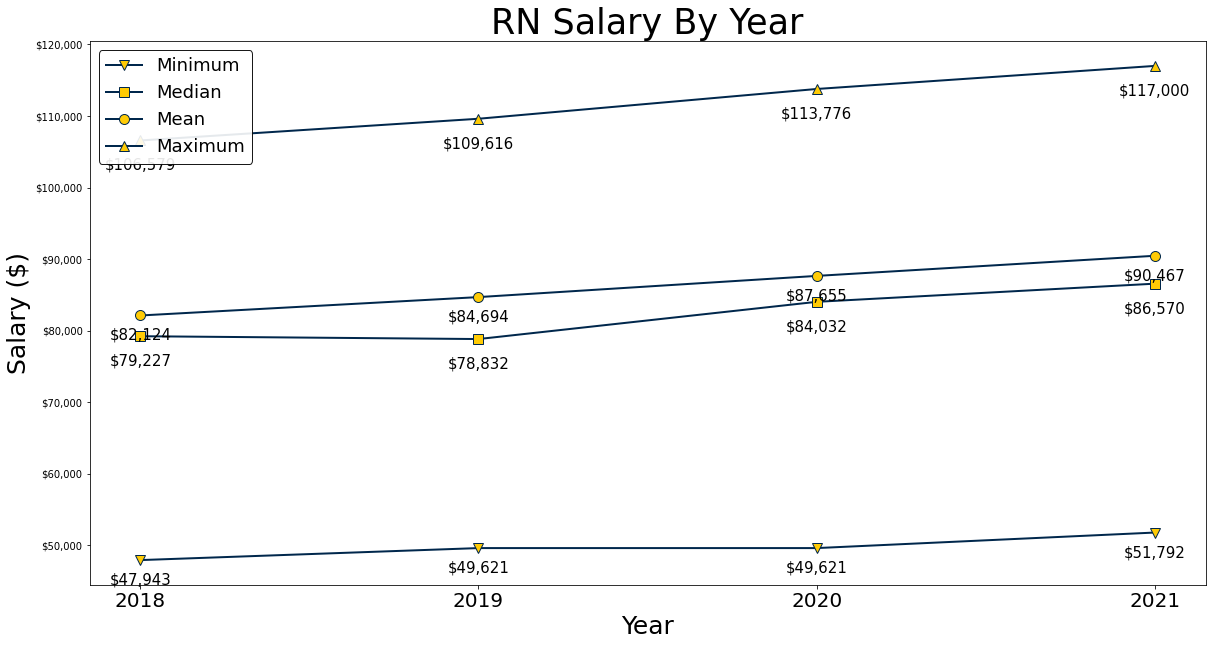

In [67]:
rn_condition = df['Title'].str.contains('registered', case=False)
salary_by_year_chart_filtered(df, rn_condition, 'RN Salary By Year', charts_save_location_dir_path, 'rn2.png')

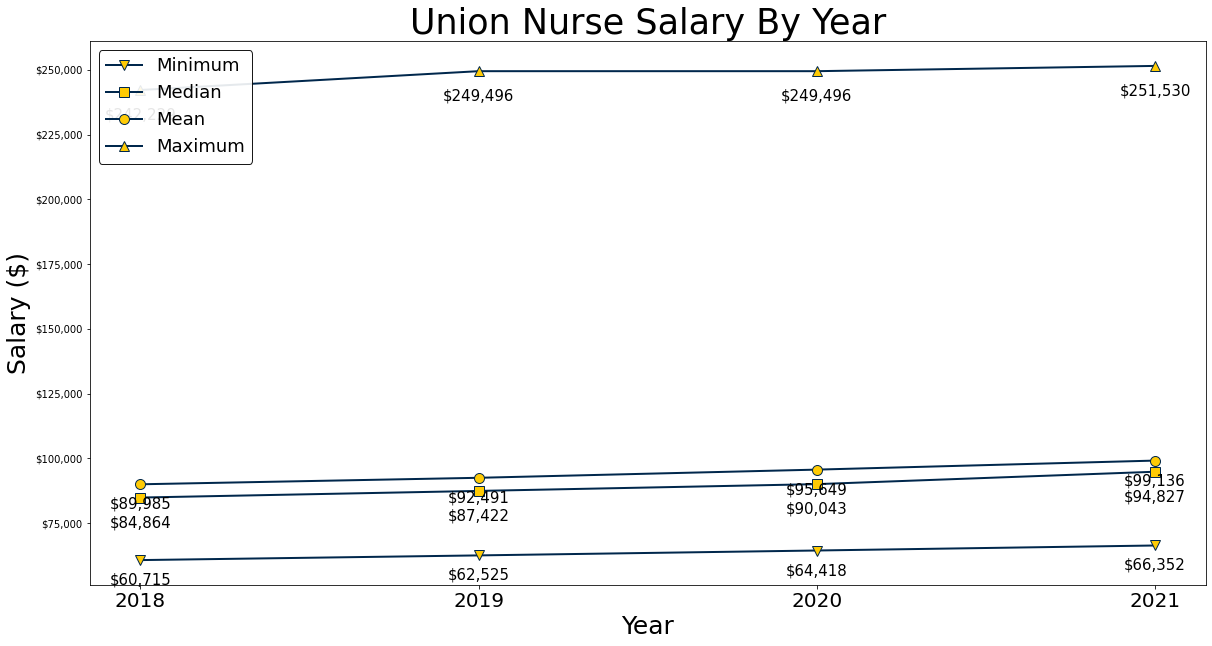

In [68]:
union_words = ['registered nurse', 'nurse anesthetist', 'nurse midwife', 'np ', 'educ nurse']
union_condition = df['Title'].str.contains('|'.join(union_words), case=False)
salary_by_year_chart_filtered(df, union_condition, 'Union Nurse Salary By Year', charts_save_location_dir_path, 'rn2.png')